<a href="https://colab.research.google.com/github/YuliiaChorna1/DataScience-03.2-Model-Training-Retraining-Sklearn/blob/main/linear_models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

Документація: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Приклади: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [31]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [32]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Генерування даних

In [33]:
blobs = datasets.make_blobs(centers=2, cluster_std=5.5, random_state=42)

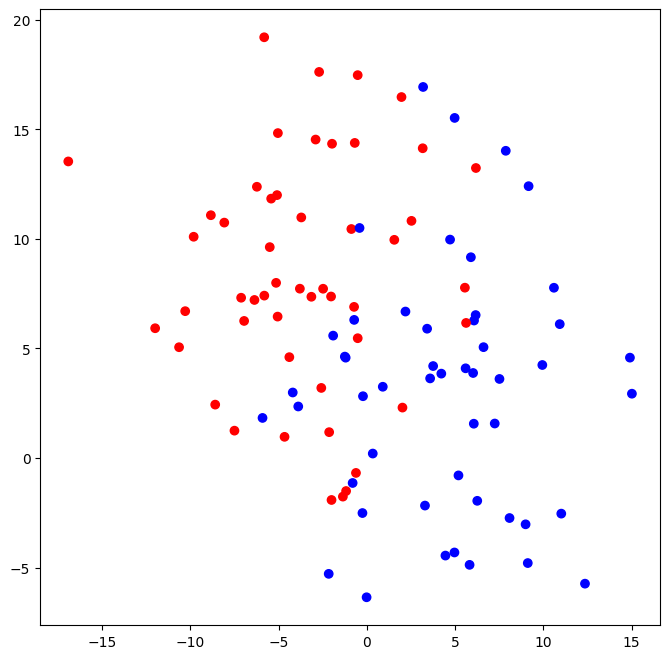

In [34]:
colors = ListedColormap(["red", "blue"])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [35]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1],
                                                                                    test_size=0.3,
                                                                                    random_state=42)

### Лінійна класифікація

#### RidgeClassifier

In [36]:
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [37]:
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(random_state=1)

In [38]:
ridge_predictions = ridge_classifier.predict(test_data)

In [39]:
print(test_labels)

[0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]


In [40]:
print(ridge_predictions)

[0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1]


In [41]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8

In [42]:
ridge_classifier.coef_

array([[ 0.09600369, -0.04736985]])

In [43]:
ridge_classifier.intercept_

array([0.30601131])

#### LogisticRegression

In [44]:
log_regressor = linear_model.LogisticRegression(random_state=1)
log_regressor.fit(train_data, train_labels)

lr_predictions = log_regressor.predict(test_data)
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [45]:
print(test_labels)

[0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]


In [46]:
print(lr_predictions)

[0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1]


In [47]:
print(lr_proba_predictions)

[[8.92589239e-01 1.07410761e-01]
 [4.29385240e-02 9.57061476e-01]
 [9.74780118e-01 2.52198821e-02]
 [7.74070172e-02 9.22592983e-01]
 [4.40785001e-02 9.55921500e-01]
 [2.61072621e-01 7.38927379e-01]
 [3.54055143e-03 9.96459449e-01]
 [1.36122991e-02 9.86387701e-01]
 [4.61202414e-01 5.38797586e-01]
 [9.17005542e-01 8.29944576e-02]
 [1.49840400e-02 9.85015960e-01]
 [8.56213910e-01 1.43786090e-01]
 [8.80551828e-03 9.91194482e-01]
 [1.04807186e-01 8.95192814e-01]
 [5.15228951e-04 9.99484771e-01]
 [1.16669872e-01 8.83330128e-01]
 [2.62057129e-02 9.73794287e-01]
 [9.36933302e-01 6.30666979e-02]
 [9.58464775e-01 4.15352250e-02]
 [9.84643751e-01 1.53562489e-02]
 [5.47319620e-03 9.94526804e-01]
 [1.80357172e-02 9.81964283e-01]
 [8.90320659e-02 9.10967934e-01]
 [5.54430788e-01 4.45569212e-01]
 [4.39856685e-02 9.56014332e-01]
 [2.00882048e-01 7.99117952e-01]
 [4.88399324e-01 5.11600676e-01]
 [4.27443842e-01 5.72556158e-01]
 [9.57207870e-01 4.27921295e-02]
 [1.24400589e-03 9.98755994e-01]]


In [48]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.7666666666666667


In [49]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.8


### Оцінка якості згідно з cross-validation

#### cross_val_score

In [50]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring="accuracy", cv=10)

In [51]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring="accuracy", cv=10)

In [52]:
lr_scoring

array([0.9, 0.6, 0.9, 0.7, 0.8, 0.8, 0.9, 0.8, 0.9, 0.8])

In [53]:
score_mean = ridge_scoring.mean()
score_max = ridge_scoring.max()
score_min = ridge_scoring.min()
score_std = ridge_scoring.std()
print(f"Ridge mean: {score_mean}, max: {score_max}, min: {score_min}, std: {score_std}")

Ridge mean: 0.8100000000000002, max: 0.9, min: 0.6, std: 0.09433981132056606


In [54]:
lr_score_mean = lr_scoring.mean()
lr_score_max = lr_scoring.max()
lr_score_min = lr_scoring.min()
lr_score_std = lr_scoring.std()

print(f"Log mean: {lr_score_mean}, max: {lr_score_max}, min: {lr_score_min}, std: {lr_score_std}")

Log mean: 0.8100000000000002, max: 0.9, min: 0.6, std: 0.09433981132056606


#### cross_val_score із заданим scorer та cv_strategy

In [55]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [56]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size = 0.3, random_state = 2)
cv_strategy.get_n_splits(blobs[1])

20

In [57]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [58]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [59]:
ridge_score_mean = ridge_scoring.mean()
ridge_score_max = ridge_scoring.max()
ridge_score_min = ridge_scoring.min()
ridge_score_std = ridge_scoring.std()

print(f"Ridge mean: {ridge_score_mean}, max: {ridge_score_max}, min: {ridge_score_min}, std: {ridge_score_std}")

Ridge mean: 0.8100000000000002, max: 0.9333333333333333, min: 0.6666666666666666, std: 0.07461009761866465


In [60]:
lr_score_mean = lr_scoring.mean()
lr_score_max = lr_scoring.max()
lr_score_min = lr_scoring.min()
lr_score_std = lr_scoring.std()

print(f"Log mean: {lr_score_mean}, max: {lr_score_max}, min: {lr_score_min}, std: {lr_score_std}")

Log mean: 0.8083333333333333, max: 0.9333333333333333, min: 0.6666666666666666, std: 0.07369230323144717
